In [408]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
from StringIO import StringIO
import requests

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [305]:
ownership_df = pd.read_csv("./data/World firearms murders and ownership.csv")
massShooting_df = pd.read_csv("./data/gun-massShooting.csv")
population_df = pd.read_excel("http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel", 
                             sheetname = 0, header = 3)
gdp_df = pd.read_excel("http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel", 
                      sheetname = 0, header = 3)

In [306]:
ownership_df.sample(10)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
146,Senegal,SN,NaN,NaN,NaN,NaN,125.0,2.0,230000.0
143,Saint Vincent and the Grenadines,VC,CTS,30.0,6.0,5.49,NaN,NaN,NaN
157,Sri Lanka,LK,CTS,21.1,291.0,1.48,133.0,1.5,300000.0
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0
114,Mongolia,MN,CTS,1.4,3.0,0.11,126.0,1.9,50000.0
103,Madagascar,MG,NaN,NaN,NaN,NaN,157.0,0.8,150000.0
70,Guyana,GY,WHO-MDB,61.3,85.0,11.46,45.0,14.6,110000.0
64,Ghana,GH,NaN,NaN,NaN,NaN,174.0,0.4,80000.0
150,Singapore,SG,CTS,5.9,1.0,0.02,169.0,0.5,22000.0
68,Guinea,GN,NaN,NaN,NaN,NaN,145.0,1.2,110000.0


In [307]:
ownership_df.dtypes

Country/Territory                            object
ISO code                                     object
Source                                       object
% of homicides by firearm                   float64
Number of homicides by firearm              float64
Homicide by firearm rate per 100,000 pop    float64
Rank by rate of ownership                   float64
Average firearms per 100 people             float64
Average total all civilian firearms         float64
dtype: object

In [308]:
massShooting_df.sample(10)

,Country,Guns/100 inhabitants,Number of mass shootings
16,New Zealand,22.6,3
22,Switzerland,45.7,2
4,Denmark,12.0,0
2,Beligium,17.2,2
17,Norway,31.3,1
14,Japan,0.6,0
11,Iceland,30.3,0
3,Canada,30.8,4
13,Italy,11.9,0
10,Hungary,5.5,0


In [309]:
population_df.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
224,Seychelles,SYC,"Population, total",SP.POP.TOTL,41700.0,42889.0,44042.0,45176.0,46322.0,47500.0,...,85033.0,86956.0,87298.0,89770.0,87441.0,88303.0,89949.0,91359.0,93419.0,94677.0
141,Lithuania,LTU,"Population, total",SP.POP.TOTL,2778550.0,2823550.0,2863350.0,2898950.0,2935200.0,2971450.0,...,3231294.0,3198231.0,3162916.0,3097282.0,3028115.0,2987773.0,2957689.0,2932367.0,2904910.0,2872298.0
194,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3494496.0,3596688.0,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0
70,Ethiopia,ETH,"Population, total",SP.POP.TOTL,22151278.0,22671190.0,23221389.0,23798429.0,24397024.0,25013626.0,...,81000409.0,83184892.0,85416253.0,87702670.0,90046756.0,92444183.0,94887724.0,97366774.0,99873033.0,102403196.0
123,St. Kitts and Nevis,KNA,"Population, total",SP.POP.TOTL,51195.0,51193.0,50966.0,50525.0,49930.0,49214.0,...,49783.0,50332.0,50886.0,51445.0,52006.0,52591.0,53169.0,53739.0,54288.0,54821.0
46,Costa Rica,CRI,"Population, total",SP.POP.TOTL,1333040.0,1381917.0,1432585.0,1484510.0,1537041.0,1589621.0,...,4369469.0,4429508.0,4488263.0,4545280.0,4600474.0,4654122.0,4706401.0,4757575.0,4807852.0,4857274.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,21751605.0,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0
245,Uganda,UGA,"Population, total",SP.POP.TOTL,6788214.0,7006633.0,7240174.0,7487429.0,7746198.0,8014401.0,...,30590487.0,31663896.0,32771895.0,33915133.0,35093648.0,36306796.0,37553726.0,38833338.0,40144870.0,41487965.0
50,Cayman Islands,CYM,"Population, total",SP.POP.TOTL,7865.0,8026.0,8146.0,8227.0,8298.0,8369.0,...,51483.0,52926.0,54279.0,55507.0,56579.0,57523.0,58371.0,59172.0,59963.0,60765.0
28,Barbados,BRB,"Population, total",SP.POP.TOTL,230939.0,231678.0,232586.0,233587.0,234547.0,235374.0,...,276150.0,277319.0,278470.0,279569.0,280601.0,281585.0,282509.0,283385.0,284217.0,284996.0


In [310]:
gdp_df.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
243,Tuvalu,TUV,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.703037e+07,3.029022e+07,2.710108e+07,3.182352e+07,3.931202e+07,3.987575e+07,3.832236e+07,3.725969e+07,3.267328e+07,3.421888e+07
119,Kenya,KEN,GDP (current US$),NY.GDP.MKTP.CD,7.912655e+08,7.929595e+08,8.681114e+08,9.265893e+08,9.987593e+08,9.979193e+08,...,3.195820e+10,3.589515e+10,3.702151e+10,3.999966e+10,4.195343e+10,5.041275e+10,5.509734e+10,6.144535e+10,6.376754e+10,7.052901e+10
46,Costa Rica,CRI,GDP (current US$),NY.GDP.MKTP.CD,5.075138e+08,4.903252e+08,4.791808e+08,5.119021e+08,5.425784e+08,5.929812e+08,...,2.674387e+10,3.061293e+10,3.056236e+10,3.726864e+10,4.226270e+10,4.647313e+10,4.974509e+10,5.065600e+10,5.484010e+10,5.743551e+10
17,Burkina Faso,BFA,GDP (current US$),NY.GDP.MKTP.CD,3.304428e+08,3.502472e+08,3.795672e+08,3.940407e+08,4.103218e+08,4.229168e+08,...,6.771278e+09,8.369637e+09,8.369175e+09,8.979967e+09,1.072406e+10,1.116606e+10,1.193461e+10,1.240069e+10,1.114876e+10,1.211516e+10
65,"Egypt, Arab Rep.",EGY,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,5.111621e+09,...,1.304790e+11,1.628182e+11,1.889824e+11,2.188883e+11,2.360019e+11,2.793728e+11,2.885862e+11,3.055297e+11,3.326980e+11,3.362969e+11
135,Liechtenstein,LIE,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.601300e+09,5.081433e+09,4.504549e+09,5.082366e+09,5.739977e+09,5.456009e+09,6.391736e+09,6.663501e+09,NaN,NaN
33,Canada,CAN,GDP (current US$),NY.GDP.MKTP.CD,4.109345e+10,4.076797e+10,4.197885e+10,4.465717e+10,4.888294e+10,5.390957e+10,...,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.824289e+12,1.842628e+12,1.792883e+12,1.552808e+12,1.529760e+12
181,Other small states,OSS,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.619989e+11,3.204425e+11,2.751737e+11,3.201287e+11,3.960190e+11,4.134039e+11,4.310865e+11,4.444051e+11,3.688136e+11,3.587731e+11
36,Channel Islands,CHI,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.151461e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ethiopia,ETH,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.970762e+10,2.706691e+10,3.243739e+10,2.993379e+10,3.195276e+10,4.331072e+10,4.764821e+10,5.561223e+10,6.446442e+10,7.237425e+10


In [311]:
df = massShooting_df.merge(population_df[["Country Name", "2012"]], left_on = "Country", right_on = "Country Name")\
    .merge(gdp_df[["Country Name", "2012"]], left_on = "Country", right_on = "Country Name")\
    .merge(ownership_df[["Country/Territory", "Average total all civilian firearms", "Number of homicides by firearm"]], 
           left_on = "Country", right_on = "Country/Territory")

In [312]:
df

,Country,Guns/100 inhabitants,Number of mass shootings,Country Name_x,2012_x,Country Name_y,2012_y,Country/Territory,Average total all civilian firearms,Number of homicides by firearm
0,Australia,15.0,4,Australia,22728254.0,Australia,1.538194e+12,Australia,3050000.0,30.0
1,Austria,30.4,1,Austria,8429991.0,Austria,4.074516e+11,Austria,2500000.0,18.0
2,Canada,30.8,4,Canada,34750545.0,Canada,1.824289e+12,Canada,9950000.0,173.0
3,Denmark,12.0,0,Denmark,5591572.0,Denmark,3.271489e+11,Denmark,650000.0,15.0
4,Finland,45.3,2,Finland,5413971.0,Finland,2.567065e+11,Finland,2400000.0,24.0
5,France,31.2,6,France,65659790.0,France,2.681416e+12,France,19000000.0,35.0
6,Germany,30.3,7,Germany,80425823.0,Germany,3.543984e+12,Germany,25000000.0,158.0
7,Greece,22.5,0,Greece,11045011.0,Greece,2.456707e+11,Greece,2500000.0,29.0
8,Hungary,5.5,0,Hungary,9920362.0,Hungary,1.273211e+11,Hungary,560000.0,7.0
9,Iceland,30.3,0,Iceland,320716.0,Iceland,1.421858e+10,Iceland,90000.0,0.0


In [313]:
df = df[["Country", "Guns/100 inhabitants", "Number of mass shootings", "2012_x", 
         "2012_y", "Average total all civilian firearms", "Number of homicides by firearm"]]

df.columns = ["Country", "gun_per_100_ppl", "num_mass_shooting", "pop_2012", "gdp_2012", "avg_tot_firearm", "num_homicies"]

### Plot mass shooting vs. gdp in absolute numbers, and per person, with error bars

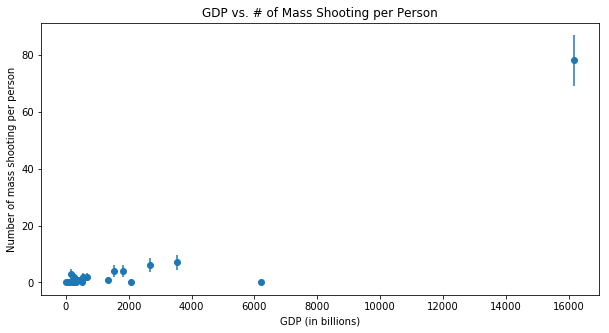

In [314]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp_2012 / 1e9, df['num_mass_shooting'])
ax.errorbar(df.gdp_2012 / 1e9, df['num_mass_shooting'], 
            yerr = np.sqrt(df['num_mass_shooting'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title("GDP vs. # of Mass Shooting per Person")
ax.set_ylim()
pl.show()

#### Caption: 

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings

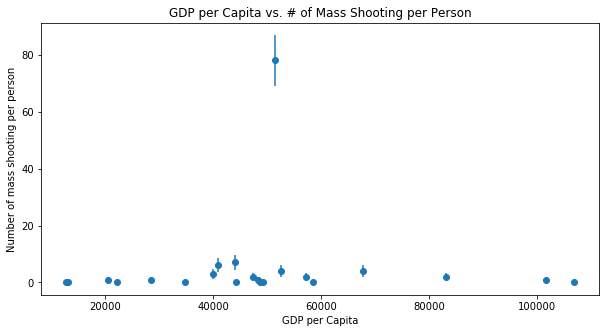

In [315]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter((df.gdp_2012/df.pop_2012), df['num_mass_shooting'])
ax.errorbar((df.gdp_2012/df.pop_2012), df['num_mass_shooting'], 
            yerr = np.sqrt(df['num_mass_shooting'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title("GDP per Capita vs. # of Mass Shooting per Person")
ax.set_ylim()
pl.show()

### Caption

United State seems to be an outliner compare to the rest of the world. 

### Plot the average number of civilian fire arms per person

In [316]:
df.dtypes

Country               object
gun_per_100_ppl      float64
num_mass_shooting      int64
pop_2012             float64
gdp_2012             float64
avg_tot_firearm      float64
num_homicies         float64
dtype: object

---


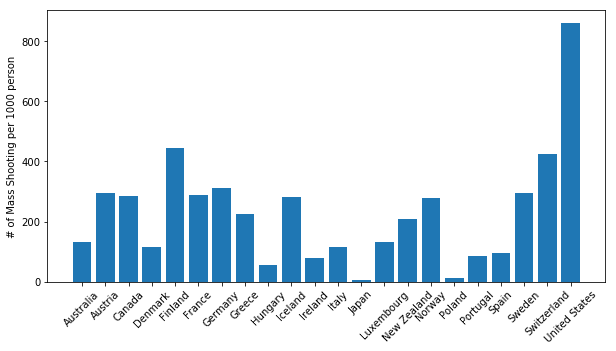

In [317]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

x = np.arange(len(df))
bar = ax.bar(x, (df.avg_tot_firearm/df.pop_2012*1000));
pl.xticks(x, df.Country, rotation = 45);
ax.set_ylabel("# of Mass Shooting per 1000 person")

/Users/Ian/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


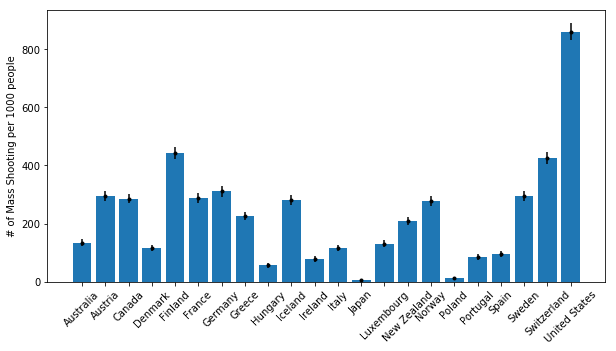

In [318]:
df['avg_tot_firearm_pp'] = df.avg_tot_firearm/df.pop_2012*1000

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

x = np.arange(len(df))
bar = ax.bar(x, (df['avg_tot_firearm_pp']));
ax.errorbar(x, df['avg_tot_firearm_pp'], yerr = np.sqrt(df['avg_tot_firearm_pp']), fmt = '.', color = "black");
pl.xticks(x, df.Country, rotation = 45);
ax.set_ylabel("# of Mass Shooting per 1000 people")

---

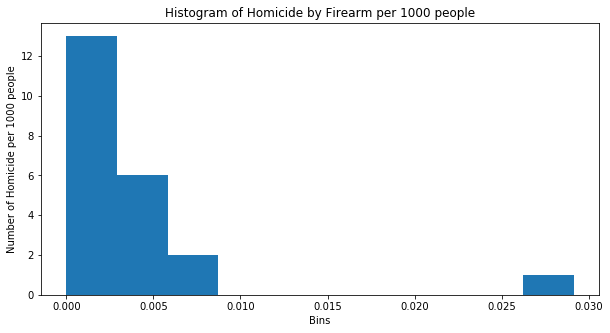

In [319]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

x = np.arange(len(df))
bar = ax.hist(df.num_homicies/df.pop_2012*1000);
ax.set_ylabel("Number of Homicide per 1000 people");
ax.set_xlabel("Bins");
ax.set_title("Histogram of Homicide by Firearm per 1000 people");

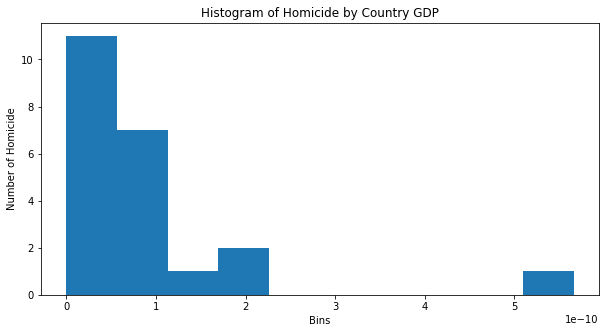

In [320]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

x = np.arange(len(df))
bar = ax.hist(df.num_homicies/df.gdp_2012);
ax.set_ylabel("Number of Homicide");
ax.set_xlabel("Bins");
ax.set_title("Histogram of Homicide by Country GDP");

### Question: why do we want to have an error bar on histogram? Doing a sqrt(# of sample per bin) does not seem to make sense.

---

In [321]:
# Assign color value based on country
color_list = []

for i in range(len(df.Country)):
    
    if df['Country'][i] == "United States":
        color_list.append("green")
    else:
        color_list.append("blue")

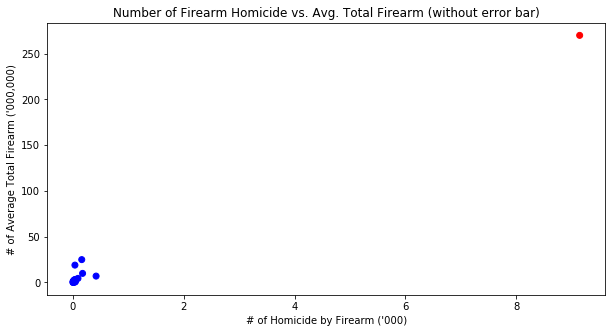

In [323]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df["num_homicies"]/1e3, df["avg_tot_firearm"]/1e6,
                 color = ((df['Country']=="United States").map({0:"b", 1:'r'})))
ax.set_xlabel("# of Homicide by Firearm ('000)");
ax.set_ylabel("# of Average Total Firearm ('000,000)");
ax.set_title("Number of Firearm Homicide vs. Avg. Total Firearm (without error bar)");

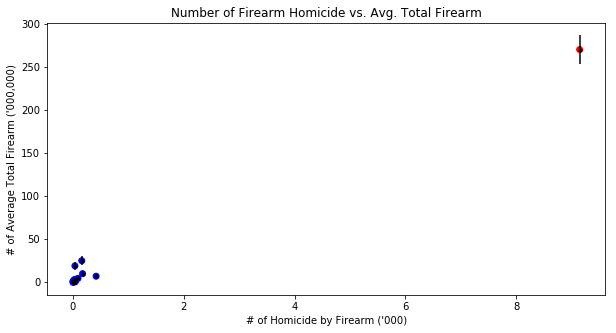

In [324]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df["num_homicies"]/1e3, df["avg_tot_firearm"]/1e6, 
                    color = ((df['Country']=="United States").map({0:"b", 1:'r'})))

ax.errorbar(df["num_homicies"]/1e3, df["avg_tot_firearm"]/1e6, 
            yerr = np.sqrt(df["avg_tot_firearm"]/1e6* 1.0), fmt = ".", color = "black")
ax.set_xlabel("# of Homicide by Firearm ('000)");
ax.set_ylabel("# of Average Total Firearm ('000,000)");
ax.set_title("Number of Firearm Homicide vs. Avg. Total Firearm");

---

plot the number of mass shootings against the number of civilian firearms. plot the US in a different color¶
with and without errorbars

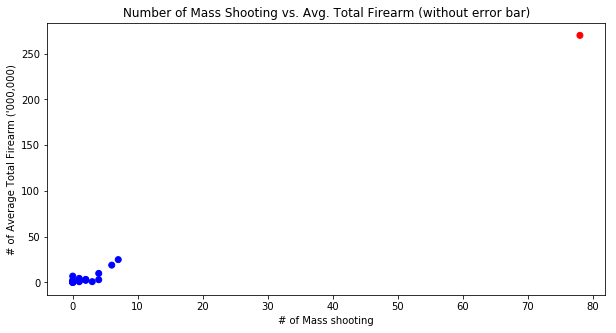

In [325]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df["num_mass_shooting"], df["avg_tot_firearm"]/1e6,
                    color = ((df['Country']=="United States").map({0:"b", 1:'r'})))
ax.set_xlabel("# of Mass shooting");
ax.set_ylabel("# of Average Total Firearm ('000,000)");
ax.set_title("Number of Mass Shooting vs. Avg. Total Firearm (without error bar)");

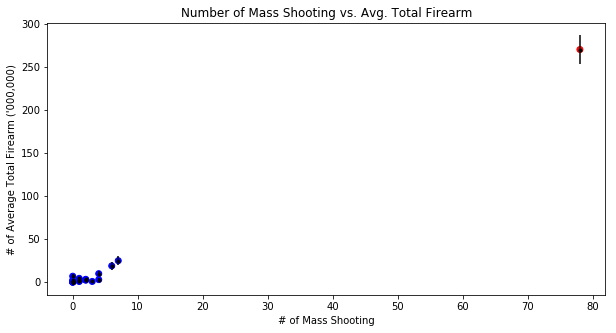

In [326]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df["num_mass_shooting"], df["avg_tot_firearm"]/1e6,
                 color = ((df['Country']=="United States").map({0:"b", 1:'r'})))
ax.errorbar(df["num_mass_shooting"], df["avg_tot_firearm"]/1e6, 
            yerr = np.sqrt(df["avg_tot_firearm"]/1e6* 1.0), fmt = ".", color = "black")
ax.set_xlabel("# of Mass Shooting");
ax.set_ylabel("# of Average Total Firearm ('000,000)");
ax.set_title("Number of Mass Shooting vs. Avg. Total Firearm");

---

## Modelling

fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.

In [327]:
df["num_mass_shooting"].mean()

5.090909090909091

In [328]:
df["avg_tot_firearm"].mean()

16285227.272727273

In [402]:
df["num_mass_shooting_pp_adj"] = df["num_mass_shooting"] / df['pop_2012'] / 1e-7
df["avg_tot_firearm_pp_adj"] = df["avg_tot_firearm"] / df['pop_2012']

y = df["num_mass_shooting_pp_adj"]
x = df["avg_tot_firearm_pp_adj"]

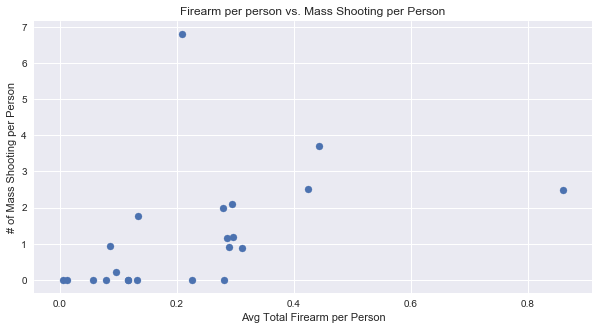

In [404]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(x, y, label = "Fire Arm vs. Mass Shooting");
ax.set_xlabel("Avg Total Firearm per Person");
ax.set_ylabel("# of Mass Shooting per Person");
ax.set_title("Firearm per person vs. Mass Shooting per Person");

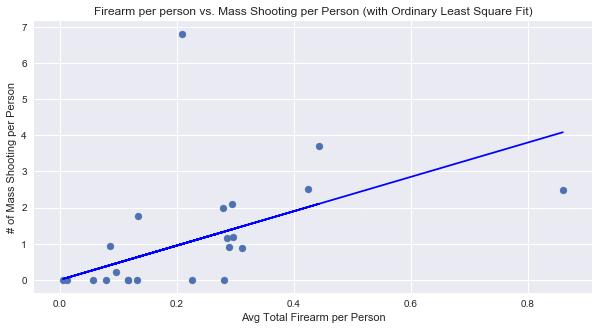

In [406]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(x, y, label = "Fire Arm vs. Mass Shooting");
ax.plot(x, sm.OLS(y, x).fit().fittedvalues, 'b-', label = "OLS fit");
ax.set_xlabel("Avg Total Firearm per Person");
ax.set_ylabel("# of Mass Shooting per Person");
ax.set_title("Firearm per person vs. Mass Shooting per Person (with Ordinary Least Square Fit)");

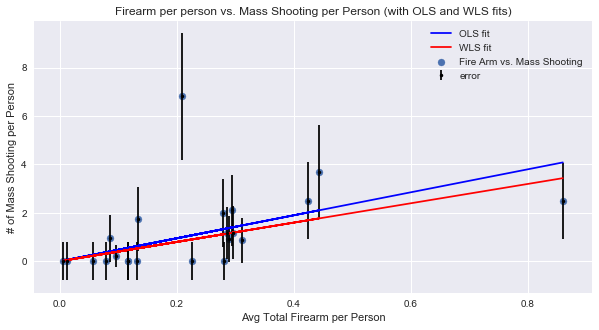

In [407]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

# Calculate error bar for WLS fit; replace 0 with average error
yerror = np.sqrt(y)
yerror[yerror == 0.0] = np.sqrt(y).mean()
yerror

scatter = ax.scatter(x, y, label = "Fire Arm vs. Mass Shooting")
ax.plot(x, sm.OLS(y, x).fit().fittedvalues, 'b-', label = "OLS fit");
ax.plot(x, sm.WLS(y, x, weights = 1./yerror).fit().fittedvalues, 'r-', label = "WLS fit");
ax.errorbar(x, y, yerr = yerror, fmt = ".", color = "black", label = "error")
ax.set_xlabel("Avg Total Firearm per Person")
ax.set_ylabel("# of Mass Shooting per Person")
ax.set_title("Firearm per person vs. Mass Shooting per Person (with OLS and WLS fits)")
ax.legend(loc = "best")

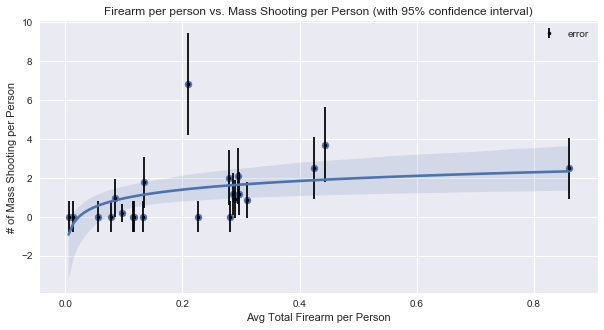

In [416]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax = sns.regplot(x = "avg_tot_firearm_pp_adj", y = "num_mass_shooting_pp_adj", data = df,
                x_estimator=np.mean, logx = True, truncate = True)
ax.errorbar(df["avg_tot_firearm_pp_adj"], df["num_mass_shooting_pp_adj"], 
            yerr = yerror, fmt = ".", color = "black", label = "error");
ax.set_xlabel("Avg Total Firearm per Person");
ax.set_ylabel("# of Mass Shooting per Person");
ax.set_title("Firearm per person vs. Mass Shooting per Person (with 95% confidence interval)");
ax.legend(loc = "best");

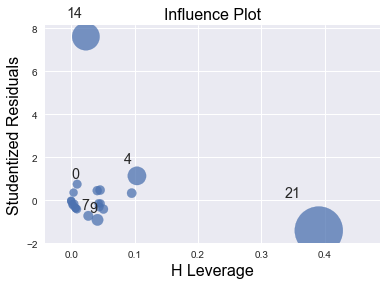

In [432]:
fig = pl.figure(figsize=(10,5)) 
ax = sm.graphics.influence_plot(sm.OLS(y, x).fit(), alpha = .5, criterion = "cooks")

In [431]:
df["Country"][14]

'New Zealand'

### Discussion

Based on the influence plot, New Zealand is an outlier. It is outside of the +/- 2 residual range. Surprisingly, US is not an outlier by this measure although it may seem so in other plots. 

United States has a strong influence on the model because of the high leverage score.